<a href="https://colab.research.google.com/github/Haniye-Rj/FRC-Capital-Reporting/blob/main/Migration_Case1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import data & libraries

In [ ]:
from google.colab import files

In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
from matplotlib import pyplot as plt
import seaborn as sns


In [ ]:
file_path = "Case Input Data.xlsx"

In [100]:
#files.upload()

Analyzing the data of each period

In [ ]:
P1 = pd.read_excel(file_path, sheet_name="Period1")
P2 = pd.read_excel(file_path, sheet_name="Period2")

In [ ]:
P1

,ID,Rating/Scoring,PD,LGD,Original Exposure,EAD Amount,CCF,REA,Capital Requirement,Expected Loss,EAD x PD,EAD x LGD
0,1,PC3-,0.02307,0.45,15267.713906,11365.027612,0.744383,14395.478341,1151.638267,117.986034,262.191187,5114.262425
1,2,PC3-,0.02307,0.45,7106.669849,7106.669849,1.000000,9001.642176,720.131374,73.777893,163.950873,3198.001432
2,3,PC3-,0.02307,0.45,2003.663787,1810.264120,0.903477,2292.965650,183.437252,18.793257,41.762793,814.618854
3,4,PC3-,0.02307,0.45,1195.053127,1154.590287,0.966141,1462.458345,116.996668,11.986379,26.636398,519.565629
4,5,PCU,0.02500,0.45,0.062612,0.062612,1.000000,0.081073,0.006486,0.000704,0.001565,0.028175
...,...,...,...,...,...,...,...,...,...,...,...,...
4047,4590,PCU,0.02500,0.45,8.528967,8.528967,1.000000,11.043714,0.883497,0.095951,0.213224,3.838035
4048,4591,PCU,0.02500,0.45,27.481093,27.481093,1.000000,35.583833,2.846707,0.309162,0.687027,12.366492
4049,4592,PCU,0.02500,0.35,1327.976726,1327.976726,1.000000,1337.410467,106.992837,11.619796,33.199418,464.791854
4050,4593,PCU,0.02500,0.45,0.025500,0.025500,1.000000,0.033019,0.002641,0.000287,0.000638,0.011475


In [ ]:
P1.isnull().sum()

,0
ID,0
Rating/Scoring,0
PD,0
LGD,0
Original Exposure,0
EAD Amount,0
CCF,0
REA,0
Capital Requirement,0
Expected Loss,0


In [ ]:
P1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4052 entries, 0 to 4051
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   4052 non-null   int64  
 1   Rating/Scoring       4052 non-null   object 
 2   PD                   4052 non-null   float64
 3   LGD                  4052 non-null   float64
 4   Original Exposure    4052 non-null   float64
 5   EAD Amount           4052 non-null   float64
 6   CCF                  4052 non-null   float64
 7   REA                  4052 non-null   float64
 8   Capital Requirement  4052 non-null   float64
 9   Expected Loss        4052 non-null   float64
 10  EAD x PD             4052 non-null   float64
 11  EAD x LGD            4052 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 380.0+ KB


In [ ]:

# Histogram of PD
fig = px.histogram(
    P1,
    x='PD',
    nbins=30,
    marginal='box',
    opacity=0.6,
    title='PD Distribution'
)

fig.update_layout(
    xaxis_title='Probability of Default (PD)',
    yaxis_title='Count of Exposures'
)

fig.show()

In [ ]:
high_risk1 = P1[P1['PD'] == 1]

In [ ]:
high_risk1

,ID,Rating/Scoring,PD,LGD,Original Exposure,EAD Amount,CCF,REA,Capital Requirement,Expected Loss,EAD x PD,EAD x LGD
7,9,PC0,1.0,0.449,0.002988,0.002988,1.000000,0.0,0.0,0.001342,0.002988,0.001342
8,10,PC0,1.0,0.450,1.960899,1.960899,1.000000,0.0,0.0,0.882405,1.960899,0.882405
15,17,PC0,1.0,0.450,17.743297,8.871654,0.500000,0.0,0.0,3.992244,8.871654,3.992244
59,61,PC0+,1.0,0.450,20690.654650,19922.558650,0.962877,0.0,0.0,8965.151392,19922.558650,8965.151392
64,67,PC0,1.0,0.450,64633.488009,7698.140402,0.119105,0.0,0.0,3464.163181,7698.140402,3464.163181
...,...,...,...,...,...,...,...,...,...,...,...,...
3560,4103,PC0+,1.0,0.450,141.482692,141.482692,1.000000,0.0,0.0,63.667212,141.482692,63.667212
3561,4104,PC0+,1.0,0.450,681.775958,367.584635,0.539158,0.0,0.0,165.413086,367.584635,165.413086
3562,4105,PC0-,1.0,0.450,2394.934500,2394.934500,1.000000,0.0,0.0,1077.720525,2394.934500,1077.720525
3563,4106,PC0-,1.0,0.450,786.914221,786.914221,1.000000,0.0,0.0,354.111399,786.914221,354.111399


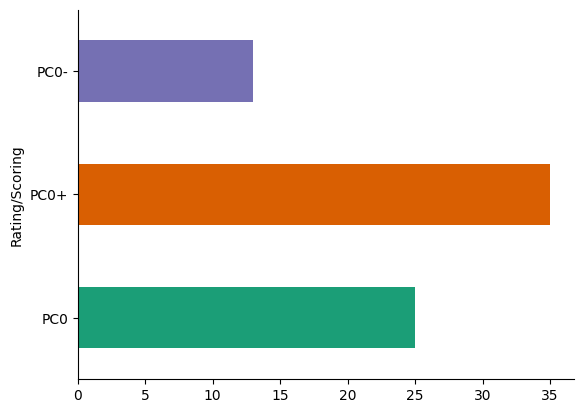

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
high_risk1.groupby('Rating/Scoring').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
P2

,ID,Rating/Scoring,PD,LGD,Original Exposure,EAD Amount,CCF,REA,Capital Requirement,Expected Loss,EAD x PD,EAD x LGD
0,1,PC0,1.000,0.45,13475.454600,9674.017620,0.717899,0.000000,0.000000,4353.307929,9674.017620,4353.307929
1,2,PC0,1.000,0.45,5837.368040,5837.368040,1.000000,0.000000,0.000000,2626.815618,5837.368040,2626.815618
2,3,PC0,1.000,0.45,1929.767360,1711.710860,0.887004,0.000000,0.000000,770.269887,1711.710860,770.269887
3,4,PC0,1.000,0.45,1247.792040,1171.725480,0.939039,0.000000,0.000000,527.276466,1171.725480,527.276466
4,5,PC0,1.000,0.45,0.066200,0.066200,1.000000,0.000000,0.000000,0.029790,0.066200,0.029790
...,...,...,...,...,...,...,...,...,...,...,...,...
4091,4092,PCU,0.025,0.45,213.506790,213.506790,1.000000,276.458797,22.116704,2.401951,5.337670,96.078056
4092,4093,PCU,0.025,0.45,463.566832,117.320906,0.253083,151.912717,12.153017,1.319860,2.933023,52.794408
4093,4094,PCU,0.025,0.45,40610.275200,40610.275200,1.000000,52584.125505,4206.730040,456.865596,1015.256880,18274.623840
4094,4095,PCU,0.025,0.00,1090.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
P2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4096 entries, 0 to 4095
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   4096 non-null   int64  
 1   Rating/Scoring       4096 non-null   object 
 2   PD                   4096 non-null   float64
 3   LGD                  4096 non-null   float64
 4   Original Exposure    4096 non-null   float64
 5   EAD Amount           4096 non-null   float64
 6   CCF                  4096 non-null   float64
 7   REA                  4096 non-null   float64
 8   Capital Requirement  4096 non-null   float64
 9   Expected Loss        4096 non-null   float64
 10  EAD x PD             4096 non-null   float64
 11  EAD x LGD            4096 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 384.1+ KB


In [ ]:
P2.isnull().sum()

,0
ID,0
Rating/Scoring,0
PD,0
LGD,0
Original Exposure,0
EAD Amount,0
CCF,0
REA,0
Capital Requirement,0
Expected Loss,0


In [ ]:

fig = px.histogram(
    P2,
    x='PD',
    nbins=30,
    marginal='box',
    opacity=0.6,
    title='PD Distribution'
)

fig.update_layout(
    xaxis_title='Probability of Default (PD)',
    yaxis_title='Count of Exposures'
)

fig.show()

In [ ]:
high_risk2 = P2[P2['PD'] == 1]

In [ ]:
high_risk2

,ID,Rating/Scoring,PD,LGD,Original Exposure,EAD Amount,CCF,REA,Capital Requirement,Expected Loss,EAD x PD,EAD x LGD
0,1,PC0,1.0,0.45,13475.454600,9674.017620,0.717899,0.0,0.0,4353.307929,9674.017620,4353.307929
1,2,PC0,1.0,0.45,5837.368040,5837.368040,1.000000,0.0,0.0,2626.815618,5837.368040,2626.815618
2,3,PC0,1.0,0.45,1929.767360,1711.710860,0.887004,0.0,0.0,770.269887,1711.710860,770.269887
3,4,PC0,1.0,0.45,1247.792040,1171.725480,0.939039,0.0,0.0,527.276466,1171.725480,527.276466
4,5,PC0,1.0,0.45,0.066200,0.066200,1.000000,0.0,0.0,0.029790,0.066200,0.029790
...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,PC0-,1.0,0.45,944.262900,491.551100,0.520566,0.0,0.0,221.197995,491.551100,221.197995
107,108,PC0-,1.0,0.00,618.090585,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
108,109,PC0-,1.0,0.45,43.785643,21.892822,0.500000,0.0,0.0,9.851770,21.892822,9.851770
109,110,PC0-,1.0,0.00,2969.358070,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000


In [ ]:

def calculate_totals(df):
    total_ead = df['EAD Amount'].sum()
    total_rwa = df['REA'].sum()
    total_el = df['Expected Loss'].sum()
    total_capital = df['Capital Requirement'].sum()
    return pd.Series({
        'Total EAD': total_ead,
        'Total RWA': total_rwa,
        'Total EL': total_el,
        'Total Capital': total_capital
    })

# Calculate totals for both periods
totals_period1 = calculate_totals(P1)
totals_period2 = calculate_totals(P2)

totals_period1


,0
Total EAD,6.898456e+07
Total RWA,4.618589e+07
Total EL,4.256298e+05
Total Capital,3.694871e+06


In [ ]:
totals_period2

,0
Total EAD,6.417768e+07
Total RWA,3.761493e+07
Total EL,5.220448e+05
Total Capital,3.009194e+06


Comparing two periods

In [ ]:

metrics = ['Total EAD', 'Total RWA', 'Total EL', 'Total Capital']
period1_values = [6.898456e+07, 4.618589e+07, 4.256298e+05, 	3.694871e+06]
period2_values = [6.417768e+07, 3.761493e+07, 5.220448e+05, 3.009194e+06]

fig = go.Figure(data=[
    go.Bar(name='Period1', x=metrics, y=period1_values),
    go.Bar(name='Period2', x=metrics, y=period2_values)
])

fig.update_layout(
    barmode='group',
    title='Credit Risk Metrics Comparison',
    yaxis_title='Amount'
)

fig.show()


In [ ]:
metrics = ['Total EAD', 'Total RWA', 'Total EL', 'Total Capital']
period1_values = [68984560, 46185890, 425630, 3694871]
period2_values = [64177680, 37614930, 522044, 3009194]

summary = pd.DataFrame({
    'Metric': metrics,
    'Period1': period1_values,
    'Period2': period2_values
})


summary['Absolute Change'] = summary['Period2'] - summary['Period1']

summary['% Change'] = (summary['Absolute Change'] / summary['Period1']) * 100

summary['Period1'] = summary['Period1'].map('{:,.0f}'.format)
summary['Period2'] = summary['Period2'].map('{:,.0f}'.format)
summary['Absolute Change'] = summary['Absolute Change'].map('{:,.0f}'.format)
summary['% Change'] = summary['% Change'].map('{:+.1f}%'.format)

print(summary)


          Metric     Period1     Period2 Absolute Change % Change
0      Total EAD  68,984,560  64,177,680      -4,806,880    -7.0%
1      Total RWA  46,185,890  37,614,930      -8,570,960   -18.6%
2       Total EL     425,630     522,044          96,414   +22.7%
3  Total Capital   3,694,871   3,009,194        -685,677   -18.6%


Identifying the existing costumers

In [ ]:
ids_p1 = set(P1['ID'])
ids_p2 = set(P2['ID'])

In [ ]:
existing_ids = ids_p1 & ids_p2
new_ids = ids_p2 - ids_p1
exited_ids = ids_p1 - ids_p2

In [ ]:
len_existing, len_new, len_exited = len(existing_ids), len(new_ids), len(exited_ids)
print("existing, new, exited counts:", len_existing, len_new, len_exited)

existing, new, exited counts: 3554 542 498


In [ ]:
existing = pd.merge(
    P1, P2,
    on='ID',
    suffixes=('_p1', '_p2'),
    how='inner'
)


In [ ]:
existing

,ID,Rating/Scoring_p1,PD_p1,LGD_p1,Original Exposure_p1,EAD Amount_p1,CCF_p1,REA_p1,Capital Requirement_p1,Expected Loss_p1,...,PD_p2,LGD_p2,Original Exposure_p2,EAD Amount_p2,CCF_p2,REA_p2,Capital Requirement_p2,Expected Loss_p2,EAD x PD_p2,EAD x LGD_p2
0,1,PC3-,0.02307,0.45,15267.713906,11365.027612,0.744383,14395.478341,1151.638267,117.986034,...,1.000,0.45,13475.454600,9674.017620,0.717899,0.000000,0.000000,4353.307929,9674.017620,4353.307929
1,2,PC3-,0.02307,0.45,7106.669849,7106.669849,1.000000,9001.642176,720.131374,73.777893,...,1.000,0.45,5837.368040,5837.368040,1.000000,0.000000,0.000000,2626.815618,5837.368040,2626.815618
2,3,PC3-,0.02307,0.45,2003.663787,1810.264120,0.903477,2292.965650,183.437252,18.793257,...,1.000,0.45,1929.767360,1711.710860,0.887004,0.000000,0.000000,770.269887,1711.710860,770.269887
3,4,PC3-,0.02307,0.45,1195.053127,1154.590287,0.966141,1462.458345,116.996668,11.986379,...,1.000,0.45,1247.792040,1171.725480,0.939039,0.000000,0.000000,527.276466,1171.725480,527.276466
4,5,PCU,0.02500,0.45,0.062612,0.062612,1.000000,0.081073,0.006486,0.000704,...,1.000,0.45,0.066200,0.066200,1.000000,0.000000,0.000000,0.029790,0.066200,0.029790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,4086,PC5-,0.00156,0.45,29.672961,29.672961,1.000000,12.033444,0.962675,0.020830,...,0.025,0.45,4.683089,4.683089,1.000000,6.063887,0.485111,0.052685,0.117077,2.107390
3550,4087,PC5-,0.00156,0.45,50.595332,50.595332,1.000000,20.518211,1.641457,0.035518,...,0.025,0.45,3.956490,3.956490,1.000000,5.123052,0.409844,0.044511,0.098912,1.780420
3551,4088,PC5-,0.00156,0.45,35.285098,35.285098,1.000000,14.309365,1.144749,0.024770,...,0.025,0.45,23.895045,23.895045,1.000000,30.940447,2.475236,0.268819,0.597376,10.752770
3552,4090,PCU,0.02500,0.45,36.793825,36.793825,1.000000,47.642404,3.811392,0.413931,...,0.025,0.45,82.887423,82.887423,1.000000,107.326598,8.586128,0.932484,2.072186,37.299341


In [ ]:
defaulted_customers_p2 = P2[P2['PD'] == 1]
defaulted_customers_p2

,ID,Rating/Scoring,PD,LGD,Original Exposure,EAD Amount,CCF,REA,Capital Requirement,Expected Loss,EAD x PD,EAD x LGD
0,1,PC0,1.0,0.45,13475.454600,9674.017620,0.717899,0.0,0.0,4353.307929,9674.017620,4353.307929
1,2,PC0,1.0,0.45,5837.368040,5837.368040,1.000000,0.0,0.0,2626.815618,5837.368040,2626.815618
2,3,PC0,1.0,0.45,1929.767360,1711.710860,0.887004,0.0,0.0,770.269887,1711.710860,770.269887
3,4,PC0,1.0,0.45,1247.792040,1171.725480,0.939039,0.0,0.0,527.276466,1171.725480,527.276466
4,5,PC0,1.0,0.45,0.066200,0.066200,1.000000,0.0,0.0,0.029790,0.066200,0.029790
...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,PC0-,1.0,0.45,944.262900,491.551100,0.520566,0.0,0.0,221.197995,491.551100,221.197995
107,108,PC0-,1.0,0.00,618.090585,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
108,109,PC0-,1.0,0.45,43.785643,21.892822,0.500000,0.0,0.0,9.851770,21.892822,9.851770
109,110,PC0-,1.0,0.00,2969.358070,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000


In [ ]:
defaulted_customers_p1 = P1[P1['PD'] == 1]
defaulted_customers_p1

,ID,Rating/Scoring,PD,LGD,Original Exposure,EAD Amount,CCF,REA,Capital Requirement,Expected Loss,EAD x PD,EAD x LGD
7,9,PC0,1.0,0.449,0.002988,0.002988,1.000000,0.0,0.0,0.001342,0.002988,0.001342
8,10,PC0,1.0,0.450,1.960899,1.960899,1.000000,0.0,0.0,0.882405,1.960899,0.882405
15,17,PC0,1.0,0.450,17.743297,8.871654,0.500000,0.0,0.0,3.992244,8.871654,3.992244
59,61,PC0+,1.0,0.450,20690.654650,19922.558650,0.962877,0.0,0.0,8965.151392,19922.558650,8965.151392
64,67,PC0,1.0,0.450,64633.488009,7698.140402,0.119105,0.0,0.0,3464.163181,7698.140402,3464.163181
...,...,...,...,...,...,...,...,...,...,...,...,...
3560,4103,PC0+,1.0,0.450,141.482692,141.482692,1.000000,0.0,0.0,63.667212,141.482692,63.667212
3561,4104,PC0+,1.0,0.450,681.775958,367.584635,0.539158,0.0,0.0,165.413086,367.584635,165.413086
3562,4105,PC0-,1.0,0.450,2394.934500,2394.934500,1.000000,0.0,0.0,1077.720525,2394.934500,1077.720525
3563,4106,PC0-,1.0,0.450,786.914221,786.914221,1.000000,0.0,0.0,354.111399,786.914221,354.111399


In [ ]:
existing['PD_change'] = existing['PD_p2'] - existing['PD_p1']
existing['RWA_change'] = existing['REA_p2'] - existing['REA_p1']
existing['EL_change'] = existing['Expected Loss_p2'] - existing['Expected Loss_p1']
existing['Capital_change'] = existing['Capital Requirement_p2'] - existing['Capital Requirement_p1']


In [ ]:
existing[existing.columns[-4:]]


,Capital_change,PD_trend,EL_trend,Capital_trend
0,-1151.638267,Increase,Increase,Decrease
1,-720.131374,Increase,Increase,Decrease
2,-183.437252,Increase,Increase,Decrease
3,-116.996668,Increase,Increase,Decrease
4,-0.006486,Increase,Increase,Decrease
...,...,...,...,...
3549,-0.477565,Increase,Increase,Decrease
3550,-1.231613,Increase,Increase,Decrease
3551,1.330487,Increase,Increase,Increase
3552,4.774736,Stable,Increase,Increase


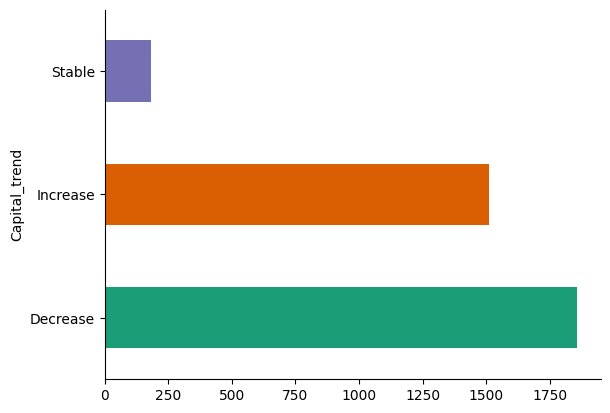

In [ ]:

existing.groupby('Capital_trend').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

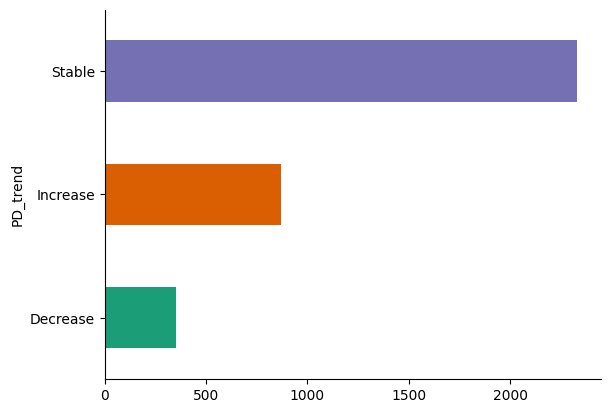

In [ ]:

existing.groupby('PD_trend').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

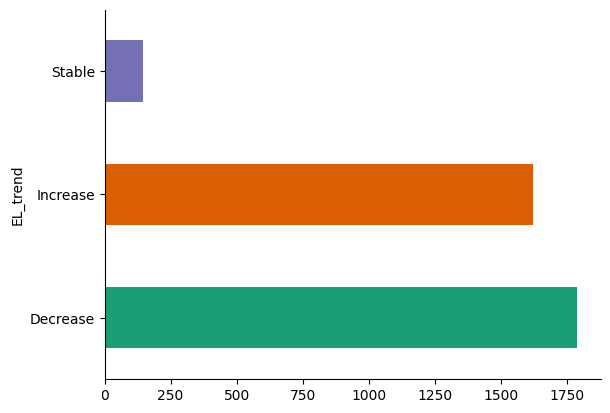

In [ ]:

existing.groupby('EL_trend').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
def label_change(x):
    if x > 0:
        return "Increase"
    elif x < 0:
        return "Decrease"
    else:
        return "Stable"

existing['PD_trend'] = existing['PD_change'].apply(label_change)
existing['EL_trend'] = existing['EL_change'].apply(label_change)
existing['Capital_trend'] = existing['Capital_change'].apply(label_change)



In [ ]:
pd_trend_counts = existing['PD_trend'].value_counts()

In [ ]:
existing['EL_trend'].value_counts()

,count
EL_trend,
Decrease,1788
Increase,1620
Stable,146


In [ ]:
existing['Capital_trend'].value_counts()

,count
Capital_trend,
Decrease,1857
Increase,1513
Stable,184


In [ ]:
def aggregate_existing(df, suffix):
    total_ead = df[f'EAD Amount_{suffix}'].sum()
    total_rwa = df[f'REA_{suffix}'].sum()
    total_el = df[f'Expected Loss_{suffix}'].sum()
    total_capital = df[f'Capital Requirement_{suffix}'].sum()
    return pd.Series({
        'Total EAD': total_ead,
        'Total RWA': total_rwa,
        'Total EL': total_el,
        'Total Capital': total_capital
    })

totals_existing_p1 = aggregate_existing(existing, 'p1')
totals_existing_p2 = aggregate_existing(existing, 'p2')


In [ ]:
totals_existing_p1


,0
Total EAD,6.740692e+07
Total RWA,4.524902e+07
Total EL,4.188226e+05
Total Capital,3.619922e+06


In [ ]:
totals_existing_p2

,0
Total EAD,6.209921e+07
Total RWA,3.591995e+07
Total EL,5.104735e+05
Total Capital,2.873596e+06


In [ ]:
overall_effect = pd.DataFrame({
    'Period1': totals_existing_p1,
    'Period2': totals_existing_p2
})

overall_effect['Absolute Change'] = overall_effect['Period2'] - overall_effect['Period1']
overall_effect['% Change'] = (overall_effect['Absolute Change'] / overall_effect['Period1']) * 100

overall_effect = overall_effect.applymap(lambda x: f"{x:,.0f}" if isinstance(x, (int,float)) else x)
print(overall_effect)


                  Period1     Period2 Absolute Change % Change
Total EAD      67,406,918  62,099,212      -5,307,707       -8
Total RWA      45,249,020  35,919,946      -9,329,073      -21
Total EL          418,823     510,474          91,651       22
Total Capital   3,619,922   2,873,596        -746,326      -21


/tmp/ipython-input-602608841.py:9: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [ ]:

num_simulations = 10000
def simulate_losses(df, pd_col, lgd_col, ead_col, n_sims=10000):
    losses = []
    for _ in range(n_sims):
        defaults = np.random.binomial(1, df[pd_col])  # default = 1 if occurs
        total_loss = np.sum(defaults * df[lgd_col] * df[ead_col])
        losses.append(total_loss)
    return np.array(losses)

losses_p1 = simulate_losses(existing, 'PD_p1', 'LGD_p1', 'EAD Amount_p1', num_simulations)
losses_p2 = simulate_losses(existing, 'PD_p2', 'LGD_p2', 'EAD Amount_p2', num_simulations)

def summarize(losses):
    el = np.mean(losses)
    var_999 = np.percentile(losses, 99.9)
    rac = var_999 - el
    return el, var_999, rac

el_p1, var_p1, rac_p1 = summarize(losses_p1)
el_p2, var_p2, rac_p2 = summarize(losses_p2)

print(f"--- Period 1 ---")
print(f"Expected Loss: {el_p1:,.2f}")
print(f"99.9% VaR: {var_p1:,.2f}")
print(f"Risk-Adjusted Capital: {rac_p1:,.2f}\n")

print(f"--- Period 2 ---")
print(f"Expected Loss: {el_p2:,.2f}")
print(f"99.9% VaR: {var_p2:,.2f}")
print(f"Risk-Adjusted Capital: {rac_p2:,.2f}")

fig = go.Figure()

fig.add_trace(go.Histogram(
    x=losses_p1,
    nbinsx=100,
    histnorm='probability density',
    name='Period 1',
    opacity=0.6,
    marker_color='blue'
))


fig.add_trace(go.Histogram(
    x=losses_p2,
    nbinsx=100,
    histnorm='probability density',
    name='Period 2',
    opacity=0.6,
    marker_color='orange'
))

fig.add_vline(x=el_p1, line=dict(color='blue', dash='dot'), annotation_text='EL p1', annotation_position='top left')
fig.add_vline(x=var_p1, line=dict(color='blue', dash='dash'), annotation_text='VaR p1', annotation_position='top right')

fig.add_vline(x=el_p2, line=dict(color='orange', dash='dot'), annotation_text='EL p2', annotation_position='top left')
fig.add_vline(x=var_p2, line=dict(color='orange', dash='dash'), annotation_text='VaR p2', annotation_position='top right')

fig.update_layout(
    title='Comparison of Portfolio Loss Distributions (Existing Customers)',
    xaxis_title='Total Portfolio Loss',
    yaxis_title='Probability Density',
    template='plotly_white',
    bargap=0.02,
    legend=dict(x=0.75, y=0.95)
)

fig.show()


--- Period 1 ---
Expected Loss: 416,719.93
99.9% VaR: 4,314,332.04
Risk-Adjusted Capital: 3,897,612.11

--- Period 2 ---
Expected Loss: 511,753.68
99.9% VaR: 985,282.09
Risk-Adjusted Capital: 473,528.42


In [ ]:
# New customers
new_customers = P2[~P2['ID'].isin(P1['ID'])]

# Exited customers
exited_customers = P1[~P1['ID'].isin(P2['ID'])]


In [ ]:
new_customers

,ID,Rating/Scoring,PD,LGD,Original Exposure,EAD Amount,CCF,REA,Capital Requirement,Expected Loss,EAD x PD,EAD x LGD
5,6,PC0,1.00000,0.450,0.022373,0.022373,1.000000,0.000000,0.000000,0.010068,0.022373,0.010068
65,66,PC0+,1.00000,0.450,173.722815,171.332595,0.986241,0.000000,0.000000,77.099668,171.332595,77.099668
89,90,PC0+,1.00000,0.450,1030.000000,515.000000,0.500000,0.000000,0.000000,231.750000,515.000000,231.750000
168,169,PC2+,0.06396,0.450,84147.011400,83544.201600,0.992836,144649.361680,11571.948934,2404.569210,5343.487134,37594.890720
169,170,PC2+,0.06396,0.325,1149.033310,1149.033310,1.000000,1436.824334,114.945947,23.884955,73.492171,373.435826
...,...,...,...,...,...,...,...,...,...,...,...,...
4091,4092,PCU,0.02500,0.450,213.506790,213.506790,1.000000,276.458797,22.116704,2.401951,5.337670,96.078056
4092,4093,PCU,0.02500,0.450,463.566832,117.320906,0.253083,151.912717,12.153017,1.319860,2.933023,52.794408
4093,4094,PCU,0.02500,0.450,40610.275200,40610.275200,1.000000,52584.125505,4206.730040,456.865596,1015.256880,18274.623840
4094,4095,PCU,0.02500,0.000,1090.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
exited_customers

,ID,Rating/Scoring,PD,LGD,Original Exposure,EAD Amount,CCF,REA,Capital Requirement,Expected Loss,EAD x PD,EAD x LGD
3554,4097,PC0,1.000,0.45,18.935869,18.935869,1.0,0.000000,0.000000,8.521141,18.935869,8.521141
3555,4098,PC0,1.000,0.40,0.804062,0.804062,1.0,0.000000,0.000000,0.321625,0.804062,0.321625
3556,4099,PC0,1.000,0.45,11.187417,5.593703,0.5,0.000000,0.000000,2.517166,5.593703,2.517166
3557,4100,PC0,1.000,0.45,1.163981,1.163981,1.0,0.000000,0.000000,0.523791,1.163981,0.523791
3558,4101,PC0,1.000,0.45,1.518917,1.518917,1.0,0.000000,0.000000,0.683513,1.518917,0.683513
...,...,...,...,...,...,...,...,...,...,...,...,...
4047,4590,PCU,0.025,0.45,8.528967,8.528967,1.0,11.043714,0.883497,0.095951,0.213224,3.838035
4048,4591,PCU,0.025,0.45,27.481093,27.481093,1.0,35.583833,2.846707,0.309162,0.687027,12.366492
4049,4592,PCU,0.025,0.35,1327.976726,1327.976726,1.0,1337.410467,106.992837,11.619796,33.199418,464.791854
4050,4593,PCU,0.025,0.45,0.025500,0.025500,1.0,0.033019,0.002641,0.000287,0.000638,0.011475


In [ ]:
def aggregate_group(df):
    total_ead = df['EAD Amount'].sum()
    total_rwa = df['REA'].sum()
    total_el = df['Expected Loss'].sum()
    total_capital = df['Capital Requirement'].sum()
    return pd.Series({
        'Total EAD': total_ead,
        'Total RWA': total_rwa,
        'Total EL': total_el,
        'Total Capital': total_capital
    })

totals_new = aggregate_group(new_customers)
totals_exited = aggregate_group(exited_customers)


In [ ]:
totals_new

,0
Total EAD,2.078471e+06
Total RWA,1.694984e+06
Total EL,1.157130e+04
Total Capital,1.355987e+05


In [ ]:
totals_exited

,0
Total EAD,1.577644e+06
Total RWA,9.368659e+05
Total EL,6.807254e+03
Total Capital,7.494927e+04


Summery of the Existing, New, Exited

In [ ]:
summary_groups = pd.DataFrame({
    'Existing': totals_existing_p2,
    'New': totals_new,
    'Exited': totals_exited
})

summary_groups = summary_groups.apply(pd.to_numeric)

summary_groups['Total Portfolio'] = summary_groups.sum(axis=1)

print(summary_groups)


                   Existing           New        Exited  Total Portfolio
Total EAD      6.209921e+07  2.078471e+06  1.577644e+06     6.575533e+07
Total RWA      3.591995e+07  1.694984e+06  9.368659e+05     3.855180e+07
Total EL       5.104735e+05  1.157130e+04  6.807254e+03     5.288521e+05
Total Capital  2.873596e+06  1.355987e+05  7.494927e+04     3.084144e+06


In [ ]:
summary_vis = pd.DataFrame({
    'Group': ['Existing', 'New', 'Exited'],
    'EAD': [totals_existing_p2['Total EAD'] - totals_existing_p1['Total EAD'],
            totals_new['Total EAD'],
            -totals_exited['Total EAD']],
    'RWA': [totals_existing_p2['Total RWA'] - totals_existing_p1['Total RWA'],
            totals_new['Total RWA'],
            -totals_exited['Total RWA']],
    'EL': [totals_existing_p2['Total EL'] - totals_existing_p1['Total EL'],
           totals_new['Total EL'],
           -totals_exited['Total EL']],
    'Capital': [totals_existing_p2['Total Capital'] - totals_existing_p1['Total Capital'],
                totals_new['Total Capital'],
                -totals_exited['Total Capital']]
})

fig = go.Figure()

for metric in ['EAD', 'RWA', 'EL', 'Capital']:
    fig.add_trace(go.Bar(
        x=summary_vis['Group'],
        y=summary_vis[metric],
        name=metric
    ))

fig.update_layout(
    barmode='group',
    title='Portfolio Migration: Contribution by Customer Group',
    xaxis_title='Customer Group',
    yaxis_title='Amount',
)
fig.show()


Customers with the most decrease/increase effect

In [ ]:
all_customers = pd.concat([
    existing[['ID', 'EL_change']].assign(Group='Existing'),
    new_customers[['ID', 'Expected Loss']].rename(columns={'Expected Loss':'EL_change'}).assign(Group='New'),
    exited_customers[['ID', 'Expected Loss']].rename(columns={'Expected Loss':'EL_change'}).assign(Group='Exited')
])

# Sort by EL_change to find top 10 riskiest
top_outliers = all_customers.sort_values('EL_change', ascending=False).head(50)
print(top_outliers)


        ID     EL_change     Group
62      64  59241.777623  Existing
92      96  34510.342526  Existing
45      47  26687.191702  Existing
88      92  24121.295976  Existing
126    130   9728.334032  Existing
67      70   9548.737564  Existing
61      63   7459.984969  Existing
53      55   7110.160405  Existing
46      48   6339.994268  Existing
47      49   5552.507223  Existing
21      23   4979.403382  Existing
48      50   4579.978087  Existing
60      62   4444.924765  Existing
0        1   4235.321895  Existing
30      32   4012.904007  Existing
232    247   3674.400948  Existing
18      20   3392.259100  Existing
27      29   3346.365970  Existing
167    174   3313.012453  Existing
63      65   3183.824463  Existing
1        2   2553.037725  Existing
50      52   2503.702214  Existing
168    169   2404.569210       New
22      24   2283.404033  Existing
55      57   2199.112041  Existing
181    182   2156.339018       New
17      19   2103.784380  Existing
57      59   2099.86

Top 10 customers increasing capital consumption

In [ ]:
top_cap_increase = existing.sort_values('Capital_change', ascending=False).head(10)
top_cap_decrease


,ID,Rating/Scoring_p1,PD_p1,LGD_p1,Original Exposure_p1,EAD Amount_p1,CCF_p1,REA_p1,Capital Requirement_p1,Expected Loss_p1,...,Expected Loss_p2,EAD x PD_p2,EAD x LGD_p2,PD_change,RWA_change,EL_change,Capital_change,PD_trend,EL_trend,Capital_trend
3039,3396,PCU,0.02500,0.450,8.513996e+06,8.513996e+06,1.000000,1.102433e+07,881946.274772,95782.450168,...,984.538517,2187.863372,2.895702e+06,-0.02466,-9.961879e+06,-94797.911651,-796950.325987,Decrease,Decrease,Decrease
3040,3397,PCU,0.02500,0.450,2.221392e+05,2.221392e+05,1.000000,2.876365e+05,23010.917270,2499.066099,...,25.585143,56.855873,7.525042e+04,-0.02466,-2.600267e+05,-2473.480956,-20802.132692,Decrease,Decrease,Decrease
1527,1706,PC4,0.00353,0.450,7.340558e+05,5.561199e+05,0.757599,3.478648e+05,27829.183355,883.396490,...,246.321262,547.380583,9.972521e+04,-0.00106,-2.323895e+05,-637.075228,-18591.161201,Decrease,Decrease,Decrease
168,175,PC2+,0.06396,0.450,1.093207e+05,1.093104e+05,0.999906,1.892613e+05,15140.906176,3146.173304,...,123.274484,273.943299,1.927368e+03,0.00000,-1.818456e+05,-3022.898819,-14547.649790,Stable,Decrease,Decrease
62,64,PC3,0.01247,0.450,1.662977e+05,1.662957e+05,0.999988,1.755453e+05,14043.626926,933.168277,...,60174.945900,133722.102000,6.017495e+04,0.98753,-1.755453e+05,59241.777623,-14043.626926,Increase,Increase,Decrease
296,311,PC3,0.01247,0.450,1.611456e+05,1.611456e+05,1.000000,1.701088e+05,13608.702089,904.268474,...,211.895526,470.878947,1.699242e+04,0.00000,-1.302475e+05,-692.372948,-10419.800594,Stable,Decrease,Decrease
1838,2044,PC4-,0.00553,0.450,5.106297e+05,4.329411e+05,0.847857,3.341922e+05,26735.376439,1077.374003,...,691.875323,1537.500718,1.251131e+05,0.00000,-1.195784e+05,-385.498680,-9566.271592,Stable,Decrease,Decrease
92,96,PC2+,0.06396,0.502,6.171331e+04,6.171331e+04,1.000000,1.191983e+05,9535.867484,1981.485874,...,36491.828400,72983.656800,3.649183e+04,0.93604,-1.191983e+05,34510.342526,-9535.867484,Increase,Increase,Decrease
88,92,PC2+,0.06396,0.450,6.653991e+04,6.653759e+04,0.999965,1.152039e+05,9216.313547,1915.084824,...,26036.380800,57858.624000,2.603638e+04,0.93604,-1.152039e+05,24121.295976,-9216.313547,Increase,Increase,Decrease
594,657,PC3+,0.00812,0.450,5.725966e+05,5.038337e+05,0.879910,4.561379e+05,36491.034462,1841.008500,...,1415.761374,3146.136386,1.743548e+05,0.00000,-1.053615e+05,-425.247126,-8428.916837,Stable,Decrease,Decrease


Top 10 customers decreasing capital consumption

In [ ]:
top_cap_decrease = existing.sort_values('Capital_change', ascending=True).head(10)
top_cap_decrease

,ID,Rating/Scoring_p1,PD_p1,LGD_p1,Original Exposure_p1,EAD Amount_p1,CCF_p1,REA_p1,Capital Requirement_p1,Expected Loss_p1,...,Expected Loss_p2,EAD x PD_p2,EAD x LGD_p2,PD_change,RWA_change,EL_change,Capital_change,PD_trend,EL_trend,Capital_trend
3039,3396,PCU,0.02500,0.450,8.513996e+06,8.513996e+06,1.000000,1.102433e+07,881946.274772,95782.450168,...,984.538517,2187.863372,2.895702e+06,-0.02466,-9.961879e+06,-94797.911651,-796950.325987,Decrease,Decrease,Decrease
3040,3397,PCU,0.02500,0.450,2.221392e+05,2.221392e+05,1.000000,2.876365e+05,23010.917270,2499.066099,...,25.585143,56.855873,7.525042e+04,-0.02466,-2.600267e+05,-2473.480956,-20802.132692,Decrease,Decrease,Decrease
1527,1706,PC4,0.00353,0.450,7.340558e+05,5.561199e+05,0.757599,3.478648e+05,27829.183355,883.396490,...,246.321262,547.380583,9.972521e+04,-0.00106,-2.323895e+05,-637.075228,-18591.161201,Decrease,Decrease,Decrease
168,175,PC2+,0.06396,0.450,1.093207e+05,1.093104e+05,0.999906,1.892613e+05,15140.906176,3146.173304,...,123.274484,273.943299,1.927368e+03,0.00000,-1.818456e+05,-3022.898819,-14547.649790,Stable,Decrease,Decrease
62,64,PC3,0.01247,0.450,1.662977e+05,1.662957e+05,0.999988,1.755453e+05,14043.626926,933.168277,...,60174.945900,133722.102000,6.017495e+04,0.98753,-1.755453e+05,59241.777623,-14043.626926,Increase,Increase,Decrease
296,311,PC3,0.01247,0.450,1.611456e+05,1.611456e+05,1.000000,1.701088e+05,13608.702089,904.268474,...,211.895526,470.878947,1.699242e+04,0.00000,-1.302475e+05,-692.372948,-10419.800594,Stable,Decrease,Decrease
1838,2044,PC4-,0.00553,0.450,5.106297e+05,4.329411e+05,0.847857,3.341922e+05,26735.376439,1077.374003,...,691.875323,1537.500718,1.251131e+05,0.00000,-1.195784e+05,-385.498680,-9566.271592,Stable,Decrease,Decrease
92,96,PC2+,0.06396,0.502,6.171331e+04,6.171331e+04,1.000000,1.191983e+05,9535.867484,1981.485874,...,36491.828400,72983.656800,3.649183e+04,0.93604,-1.191983e+05,34510.342526,-9535.867484,Increase,Increase,Decrease
88,92,PC2+,0.06396,0.450,6.653991e+04,6.653759e+04,0.999965,1.152039e+05,9216.313547,1915.084824,...,26036.380800,57858.624000,2.603638e+04,0.93604,-1.152039e+05,24121.295976,-9216.313547,Increase,Increase,Decrease
594,657,PC3+,0.00812,0.450,5.725966e+05,5.038337e+05,0.879910,4.561379e+05,36491.034462,1841.008500,...,1415.761374,3146.136386,1.743548e+05,0.00000,-1.053615e+05,-425.247126,-8428.916837,Stable,Decrease,Decrease


In [ ]:
existing_cap = existing[['ID', 'Capital_change']].assign(Group='Existing')

new_cap = new_customers[['ID', 'Capital Requirement']].rename(columns={'Capital Requirement':'Capital_change'}).assign(Group='New')

exited_cap = exited_customers[['ID', 'Capital Requirement']].rename(columns={'Capital Requirement':'Capital_change'})
exited_cap['Capital_change'] = -exited_cap['Capital_change']
exited_cap['Group'] = 'Exited'

all_capital = pd.concat([existing_cap, new_cap, exited_cap])

top_increase = all_capital.sort_values('Capital_change', ascending=False).head(50)
print("Top 50 Capital Increases:")
print(top_increase)



Top 50 Capital Increases:
        ID  Capital_change     Group
126    130    31191.474366  Existing
687    757    29455.218598  Existing
972   1090    16002.564227  Existing
1485  1662    12930.098570  Existing
170    177    12647.034305  Existing
564    565    12600.207018       New
168    169    11571.948934       New
181    182    10377.345305       New
2035  2036    10301.561169       New
1131  1279     9993.841569  Existing
167    174     9447.867704  Existing
232    247     9068.828253  Existing
131    135     8766.719713  Existing
1834  2040     8571.727646  Existing
591    654     6689.806535  Existing
1177  1329     6272.481326  Existing
420    452     5788.729197  Existing
1671  1867     5456.846590  Existing
2079  2080     5395.004313       New
2211  2212     5259.565957       New
1037  1038     4924.723608       New
178    189     4867.541304  Existing
768    845     4748.314120  Existing
1081  1082     4680.344319       New
2090  2091     4582.432700       New
723    794  

top decrease

In [ ]:
top_decrease = all_capital.sort_values('Capital_change', ascending=True).head(50)
print("Top 50 Capital Decreases:")
print(top_decrease)


Top 50 Capital Decreases:
        ID  Capital_change     Group
3039  3396  -796950.325987  Existing
3040  3397   -20802.132692  Existing
1527  1706   -18591.161201  Existing
168    175   -14547.649790  Existing
62      64   -14043.626926  Existing
296    311   -10419.800594  Existing
1838  2044    -9566.271592  Existing
92      96    -9535.867484  Existing
88      92    -9216.313547  Existing
594    657    -8428.916837  Existing
2759  3075    -8227.687673  Existing
3003  3355    -7928.062139  Existing
648    714    -7512.244549  Existing
3176  3545    -7198.688640  Existing
3603  4146    -5647.630651    Exited
1856  2064    -4983.343214  Existing
1715  1914    -4813.441030  Existing
666    733    -4559.201066  Existing
2022  2250    -4381.533623  Existing
3041  3398    -4317.356126  Existing
2653  2951    -4205.073174  Existing
2506  2787    -4130.545906  Existing
1946  2165    -3991.356270  Existing
3159  3523    -3930.816270  Existing
3604  4147    -3838.513301    Exited
364    391  

In [ ]:
threshold_75 = all_capital['Capital_change'].quantile(0.75)
top_25_percent = all_capital[all_capital['Capital_change'] >= threshold_75].sort_values('Capital_change', ascending=False)

In [ ]:
top_25_percent



,ID,Capital_change,Group
126,130,31191.474366,Existing
687,757,29455.218598,Existing
972,1090,16002.564227,Existing
1485,1662,12930.098570,Existing
170,177,12647.034305,Existing
...,...,...,...
3701,3702,4.298727,New
2428,2698,4.286589,Existing
952,953,4.270620,New
3547,4084,4.267324,Existing


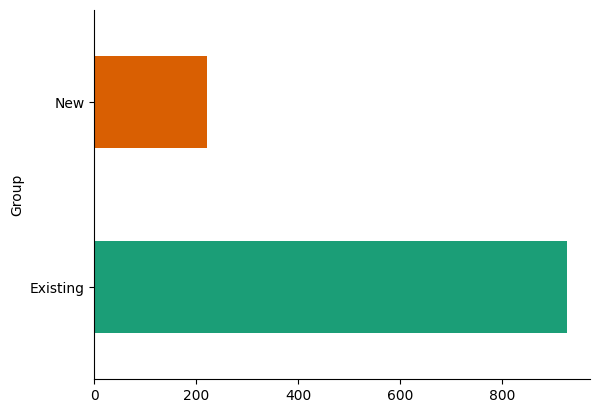

In [ ]:
top_25_percent.groupby('Group').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)